__Goal : To find if customer will churn or not__
    
    Classifier Type problem. Solving using Logistic regression.relu for hidden layers. Sigmoid for output layers.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

__Importing the dataset__

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


__data cleaning__

In [4]:
df.drop('customerID', axis= 'columns', inplace = True) # Customer Id is useless Drop it.

In [5]:
df.dtypes # Printing the datatypes for each column. We want them all to be in a form of integer or floats. Max are objects.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values # Observe that TotalCharges are all strings(objects). Convert them to numbers. 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') 
# This will ignore the spaces values and print NA before it while converting the rest of them to number format. 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull() # Will return true if NA.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
type(pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()) # Returns a pandas series

pandas.core.series.Series

In [10]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull().dtype # Returns a boolean output

dtype('bool')

In [11]:
pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull().shape

(7043,)

In [12]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()] 
# Returns only those cells where pandas series returned a True Output.Observe the total charges being blank. 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()].shape
#11 rows and 20 columsn as o/p is too small compared to a dataset with 7043 rows. 
# So we can drop them rather than filling them with any arbitrary value.

(11, 20)

In [14]:
df.iloc[488] # At 488th index we can see that the total charges are blank.

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
df.iloc[488]['TotalCharges'] # Blank

' '

In [16]:
df1 = df[df.TotalCharges!= ' ']

In [17]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()]  
# Observe we do not get any True values in return where Total Charges are kept as blank.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\1685631680.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[pd.to_numeric(df.TotalCharges,errors = 'coerce') .isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
df1.shape

(7032, 20)

In [20]:
df1.dtypes
# Total charges displays datatype as object. All the blnaks been removed.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
pd.to_numeric(df1.TotalCharges)
# Trying to convert again to the numeric values after removing all the blanks.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [22]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges) 
# Saving it to the total charges columns. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\2045078584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [23]:
df1.TotalCharges.dtypes

dtype('float64')

In [24]:
df1.dtypes
# Observe the TotalCharges changed to float.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

__A quick Visualization for tenure__

In [25]:
df1[df1.Churn=='No'] # Returns dataset where churn is set at value = No

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [26]:
df1[df1.Churn=='No'].tenure # Returns pandas series of tenure column only where the churn is set at value 'No'.

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [27]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
# Saving the variable format of pandas series returned for Yes and No

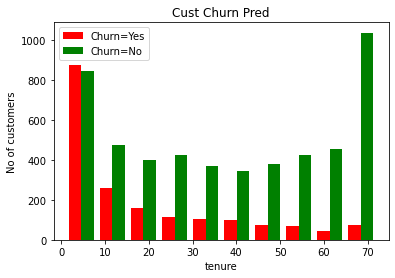

In [28]:
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red','green'],label = ['Churn=Yes','Churn=No'])

plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.title("Cust Churn Pred")
plt.legend()
# Plotting the churn histogram
# We can observe that the tenured customer is not leaving indicated by green.

__A quick Visualization for monthly charges__

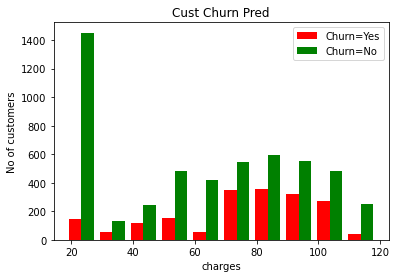

In [29]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([mc_churn_yes, mc_churn_no], color = ['red','green'],label = ['Churn=Yes','Churn=No'])

plt.xlabel("charges")
plt.ylabel("No of customers")
plt.title("Cust Churn Pred")
plt.legend()

__As we can see that most of our columns are in the format yes or No. So we need to bring them in a format of numbers 0 or 1__ 

In [30]:
df['gender'].unique
# Printing the unique entries

<bound method Series.unique of 0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object>

In [31]:
# Implementing for loop for printing all the individual entries in each of the respective columns.
def unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object': ## To skip the numeric dtypes. We need not work on them. 
            print (f'{column} : {df[column].unique()}')  # here df.[]unique() above df[].unique

__As  we see below that our dataset contains objects to a greater extent. We somehow need to deal with this kind of data and try to convert each of the values in the form of numeric.__

In [32]:
unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


__For OnlineSecurity, DeviceProtection, StreamingTV we can see the value as 'No internet service' which can be replaced by 'No'. Its one and the same thing.__

In [33]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\494651664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\494651664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [34]:
unique_col_values(df1) # Observe the changes reflected.

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
all_columns= list(df1.columns.values)
all_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [36]:
yes_no_columns = ['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [37]:
# Replacing using each column individually
for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\1493105626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace = True)


In [38]:
unique_col_values(df1) # Shows only object type, as set in above function

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [39]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3344\1620502196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True)


In [40]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [41]:
for column in df1:
    print (f'{column} : {df1[column].unique()}')  # here df.[]unique() above df[].unique

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [42]:
unique_col_values(df1) # Shows only object type, as set in above function

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


__Till here we tried to clean all the data that contained non numeric values. Above columns canot be converted to numeric values, but each column type can be separated out for the binary output.__

In [43]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract','PaymentMethod'])

In [44]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
df2.dtypes # ALL data types are numeric

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

__Scaling data using sklearns minmax scaler__

In [46]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [47]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [49]:
# Observe the tenure , mionthly charges, total charges columns scaled to range between 0-1.
for column in df2:
    print (f'{column} : {df2[column].unique()}')  # here df.[]unique() above df[].unique

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

__Train_Test Splitting__

In [50]:
X = df2.drop('Churn',axis = 'columns')
y = df2['Churn']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 5)

In [52]:
X_train.shape

(5625, 26)

In [53]:
X_test.shape

(1407, 26)

In [54]:
y_train.shape

(5625,)

In [55]:
y_test.shape

(1407,)

In [58]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential ([
    keras.layers.Dense (200,input_shape= (26,), activation = 'relu'),
    keras.layers.Dense (100, activation = 'relu'),
    keras.layers.Dense (1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit (X_train, y_train,epochs = 300)

Epoch 1/300
176/176 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7815
Epoch 2/300
176/176 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.8009
Epoch 3/300
176/176 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8043
Epoch 4/300
176/176 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8112
Epoch 5/300
176/176 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8130
Epoch 6/300
176/176 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8148
Epoch 7/300
176/176 [==============================] - 0s 3ms/step - loss: 0.3916 - accuracy: 0.8148
Epoch 8/300
176/176 [==============================] - 1s 3ms/step - loss: 0.3878 - accuracy: 0.8155
Epoch 9/300
176/176 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8167
Epoch 10/300
176/176 [==============================] - 1s 3ms/step - loss: 0.3777 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.1375 - accuracy: 0.9372
Epoch 82/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9378
Epoch 83/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1338 - accuracy: 0.9380
Epoch 84/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9364
Epoch 85/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9388
Epoch 86/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9396
Epoch 87/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9406
Epoch 88/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9378
Epoch 89/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1293 - accuracy: 0.9408
Epoch 90/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1297 - accuracy: 

176/176 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9468
Epoch 161/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9477
Epoch 162/300
176/176 [==============================] - 1s 3ms/step - loss: 0.1039 - accuracy: 0.9499
Epoch 163/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9481
Epoch 164/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9488
Epoch 165/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.9506
Epoch 166/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1046 - accuracy: 0.9488
Epoch 167/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9474
Epoch 168/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9483
Epoch 169/300
176/176 [==============================] - 0s 3ms/step - loss: 0.1017 - a

176/176 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9534
Epoch 240/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9547
Epoch 241/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 0.9547
Epoch 242/300
176/176 [==============================] - 0s 2ms/step - loss: 0.0940 - accuracy: 0.9538
Epoch 243/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9559
Epoch 244/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9513
Epoch 245/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9552
Epoch 246/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.9554
Epoch 247/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.9552
Epoch 248/300
176/176 [==============================] - 0s 3ms/step - loss: 0.0922 - a

In [59]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 2ms/step - loss: 1.6711 - accuracy: 0.7441


[1.6711270809173584, 0.7441364526748657]

In [60]:
yp= model.predict(X_test)
yp[:10]

44/44 [==============================] - 0s 3ms/step


array([[9.8735273e-01],
       [1.0045461e-02],
       [1.4976489e-11],
       [6.4225566e-01],
       [6.9952708e-01],
       [9.9999821e-01],
       [1.5120220e-16],
       [3.4102215e-04],
       [9.5197350e-01],
       [9.9786615e-01]], dtype=float32)

In [92]:
y_test_list = list(y_test)

In [87]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [88]:
y_pred[0:20]

[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]

In [64]:
y_test.shape

(1407,)

In [65]:
y_test.count()

1407

In [93]:
cm= tf.math.confusion_matrix(y_test_list,y_pred) # Using tensorflow.

Text(69.0, 0.5, 'True')

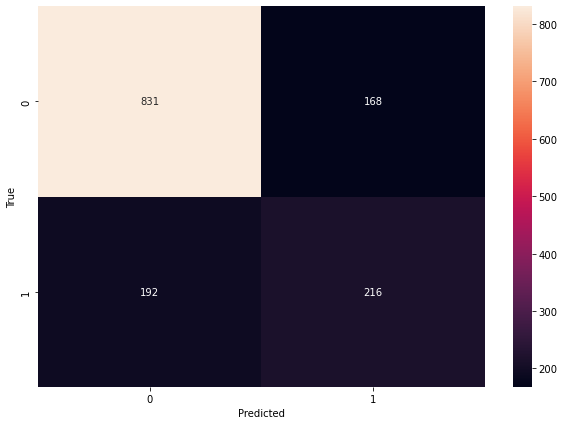

In [94]:
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       999
           1       0.56      0.53      0.55       408

    accuracy                           0.74      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.74      0.74      0.74      1407



In [96]:
confusion_matrix(y_test,y_pred) # using sklearn

array([[831, 168],
       [192, 216]], dtype=int64)